## 使用Pandas 讀取客戶流失數據

In [4]:
import pandas
df = pandas.read_csv('customer_churn.csv', index_col=0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## 數據預處理

In [5]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [17]:
# 取得第三欄以後的資訊
# df[列,欄]
df = df.ix[ : , 3: ]

In [18]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [21]:
## lambda
def square(x):
    return x * x
square(2)

square2 = lambda x: x * x
square2(3)

9

In [24]:
cat_var = ['international_plan', 'voice_mail_plan', 'churn' ]
for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

In [26]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 建立模型

In [28]:
X = df.ix[:,:-1]
y = df.ix[:,-1]

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
tree.export_graphviz(clf, 'tree.dot')
#dot -Tpng tree.dot -Otree.png

Populating the interactive namespace from numpy and matplotlib


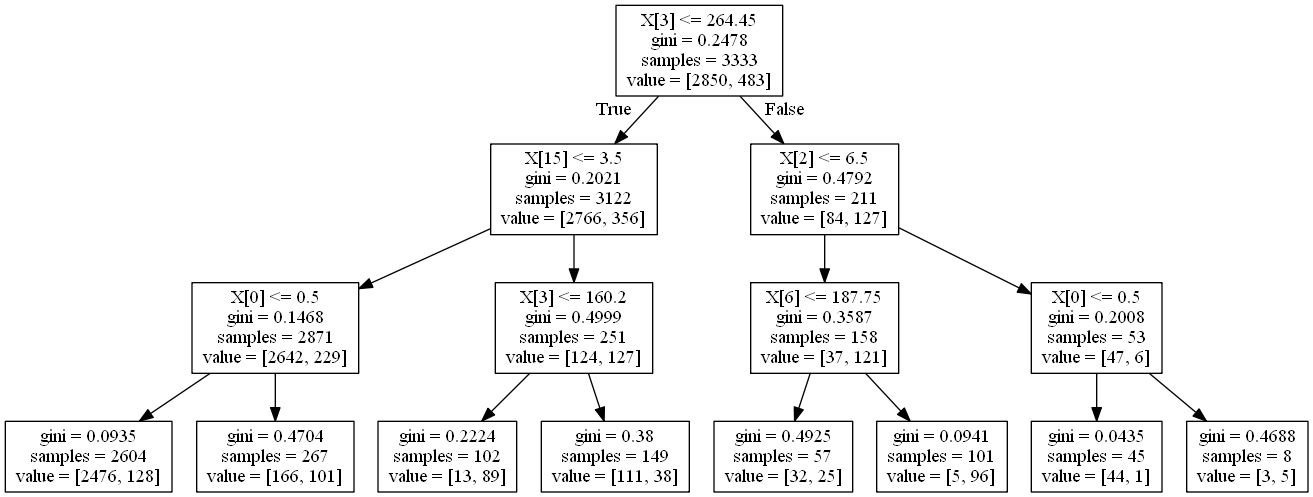

In [40]:
%pylab inline
from IPython.display import Image
Image('tree.png')

In [51]:
X.columns[clf.feature_importances_.argsort()[::-1]]

Index(['total_day_minutes', 'number_customer_service_calls',
       'international_plan', 'total_day_charge', 'voice_mail_plan',
       'total_eve_charge', 'total_intl_charge', 'total_intl_calls',
       'total_intl_minutes', 'total_night_charge', 'total_night_calls',
       'total_night_minutes', 'total_eve_calls', 'total_eve_minutes',
       'total_day_calls', 'number_vmail_messages'],
      dtype='object')

## 建立 Dummy Variable (選項)

In [8]:
len(df['state'].unique())

51

In [10]:
import pandas
dummies = pandas.get_dummies(df['state'])
del dummies['AK']

In [13]:
dummies.columns

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object')

In [15]:
df2 = pandas.concat([df, dummies], axis = 1)
df2.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
